<a href="https://colab.research.google.com/github/oerv13-gh/Ibero/blob/main/Semama_7_Apre_Auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aprendizaje no Supervisado (Clustering)

Libreria a usar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import kagglehub

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [2]:
path = kagglehub.dataset_download(
    "vjchoudhary7/customer-segmentation-tutorial-in-python"
)

print("Path to dataset files:", path)

os.listdir(path)


Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


['Mall_Customers.csv']

In [3]:
csv_path = os.path.join(path, "Mall_Customers.csv")
df = pd.read_csv(csv_path)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


1. Clustering KMeans

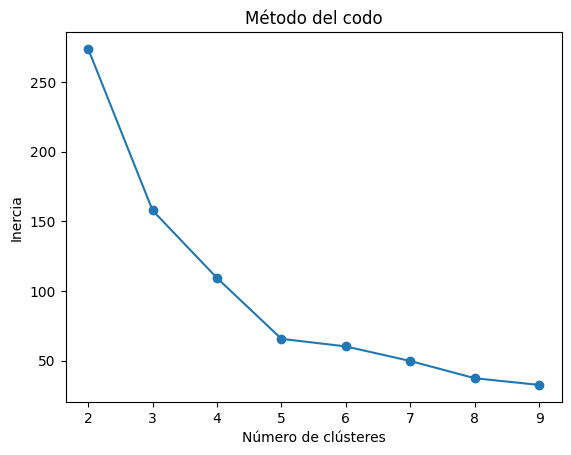

In [10]:
inertia = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,10), inertia, marker='o')
plt.xlabel("Número de clústeres")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.show()

In [ ]:
inertia = []

lim_ini=2
lim_fin=12

for k in range(lim_ini,lim_fin):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(lim_ini,lim_fin), inertia, marker='o')
plt.xlabel("Número de clústeres")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels_km = kmeans.fit_predict(X_scaled)

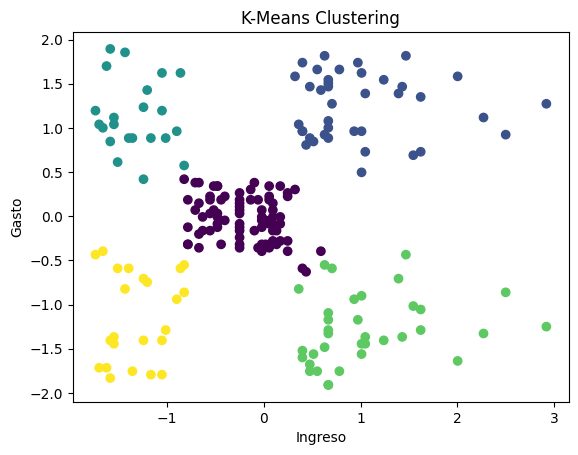

In [12]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_km, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Ingreso")
plt.ylabel("Gasto")
plt.show()

In [13]:
print("Silhouette:", silhouette_score(X_scaled, labels_km))
print("Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_km))

Silhouette: 0.5546571631111091
Davies-Bouldin: 0.5722356162263352


2. Clustering DBSCAN

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)


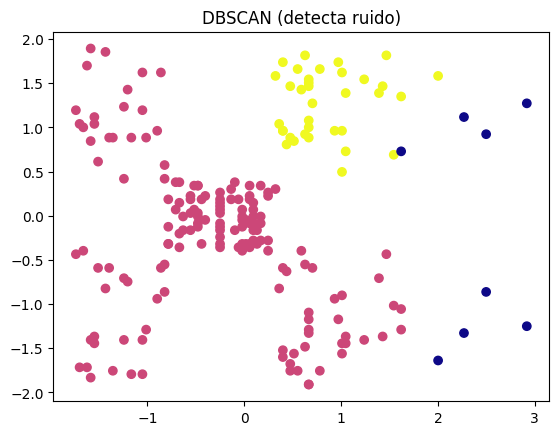

In [15]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_db, cmap='plasma')
plt.title("DBSCAN (detecta ruido)")
plt.show()

3. Clustering Jerqarquico

In [16]:
agg = AgglomerativeClustering(n_clusters=5)
labels_agg = agg.fit_predict(X_scaled)

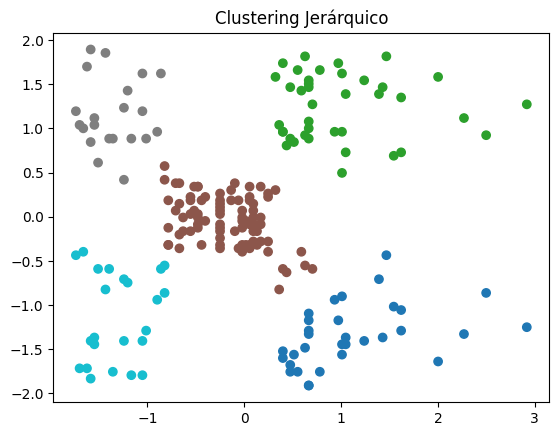

In [17]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_agg, cmap='tab10')
plt.title("Clustering Jerárquico")
plt.show()

**4. Autoconder simple (Keras)**

In [18]:
input_dim = X_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(4, activation='relu')(input_layer)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(4, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, verbose=0)

In [19]:
X_latent = encoder.predict(X_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [20]:
kmeans_nn = KMeans(n_clusters=5, random_state=42)
labels_nn = kmeans_nn.fit_predict(X_latent)

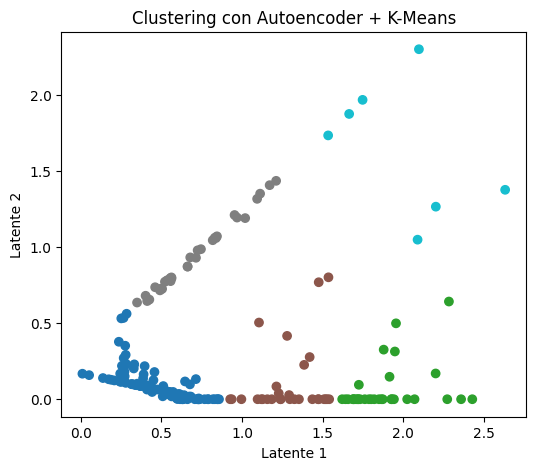

In [22]:
plt.figure(figsize=(6,5))
plt.scatter(X_latent[:,0], X_latent[:,1], c=labels_nn, cmap='tab10')
plt.title("Clustering con Autoencoder + K-Means")
plt.xlabel("Latente 1")
plt.ylabel("Latente 2")
plt.show()

**5. Clustering SOM**

In [23]:
!pip -q install minisom


  Preparing metadata (setup.py) ... done


In [24]:
from minisom import MiniSom

In [25]:
som_x, som_y = 10, 10            # tamaño de la rejilla (10x10)
sigma = 1.0
learning_rate = 0.5

som = MiniSom(
    x=som_x, y=som_y,
    input_len=X_scaled.shape[1],
    sigma=sigma,
    learning_rate=learning_rate,
    random_seed=42
)

som.random_weights_init(X_scaled)
som.train_random(X_scaled, num_iteration=2000)

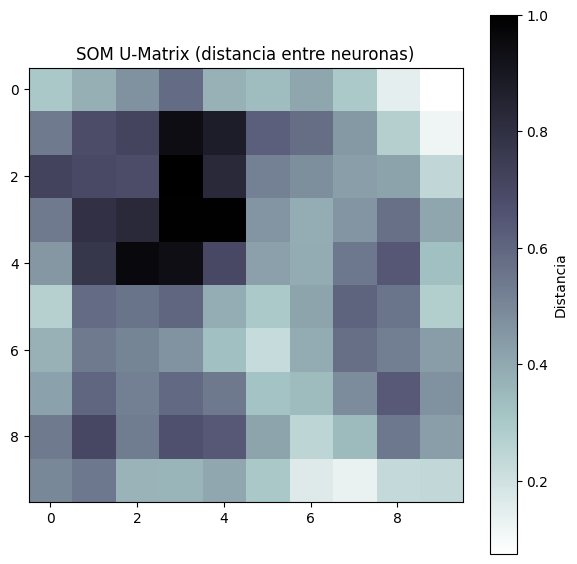

In [26]:
plt.figure(figsize=(7,7))
plt.title("SOM U-Matrix (distancia entre neuronas)")
u_matrix = som.distance_map()
plt.imshow(u_matrix, cmap='bone_r')
plt.colorbar(label="Distancia")
plt.show()

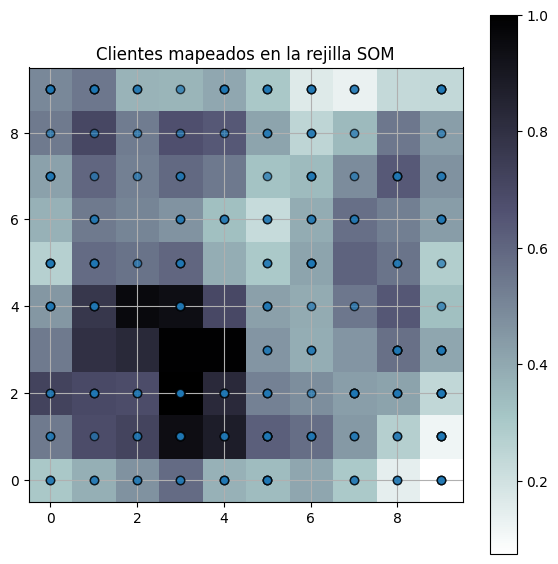

In [27]:
plt.figure(figsize=(7,7))
plt.title("Clientes mapeados en la rejilla SOM")
plt.imshow(som.distance_map(), cmap='bone_r')
plt.colorbar()

for x in X_scaled:
    w = som.winner(x)  # neurona ganadora (BMU)
    plt.plot(w[0], w[1], 'o', markerfacecolor='tab:blue', markeredgecolor='k', markersize=6, alpha=0.7)

plt.xlim(-0.5, som_x-0.5)
plt.ylim(-0.5, som_y-0.5)
plt.grid(True)
plt.show()

In [28]:
# Cada punto se asigna a su neurona ganadora (BMU)
bmus = np.array([som.winner(x) for x in X_scaled])

# Convertimos coordenadas (i, j) a una etiqueta única
labels_som = bmus[:, 0] * som._weights.shape[1] + bmus[:, 1]

**Comparacion metricas de algoritmos clusteging usados**

In [29]:
# K-Means
sil_km = silhouette_score(X_scaled, labels_km)

# Jerárquico
sil_agg = silhouette_score(X_scaled, labels_agg)

# Autoencoder + KMeans
sil_nn = silhouette_score(X_latent, labels_nn)

# DBSCAN (sin ruido)
mask = labels_db != -1
sil_db = silhouette_score(X_scaled[mask], labels_db[mask])

# SOM (red neuronal)
sil_som = silhouette_score(X_scaled, labels_som)

In [30]:
results = pd.DataFrame({
    "Algoritmo": [
        "K-Means",
        "Jerárquico",
        "Autoencoder + KMeans",
        "DBSCAN (sin ruido)",
        "SOM (Red neuronal)"
    ],
    "Silhouette": [
        sil_km,
        sil_agg,
        sil_nn,
        sil_db,
        sil_som
    ]
})


In [31]:
results = (
    results
    .sort_values(by="Silhouette", ascending=False)
    .reset_index(drop=True)          # ← elimina el índice viejo
)

results["Ranking"] = results.index + 1
results

,Algoritmo,Silhouette,Ranking
0,Autoencoder + KMeans,0.561650,1
1,K-Means,0.554657,2
2,Jerárquico,0.553809,3
3,DBSCAN (sin ruido),0.387558,4
4,SOM (Red neuronal),0.358915,5


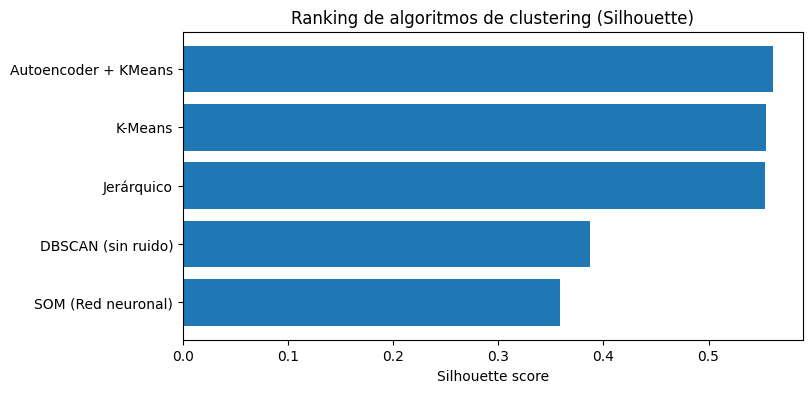

In [32]:
plt.figure(figsize=(8,4))
plt.barh(results["Algoritmo"], results["Silhouette"])
plt.gca().invert_yaxis()
plt.title("Ranking de algoritmos de clustering (Silhouette)")
plt.xlabel("Silhouette score")
plt.show()

In [33]:
# K-Means
db_km = davies_bouldin_score(X_scaled, labels_km)

# Jerárquico
db_agg = davies_bouldin_score(X_scaled, labels_agg)

# Autoencoder + KMeans (en espacio latente)
db_nn = davies_bouldin_score(X_latent, labels_nn)

# DBSCAN (sin ruido)
mask = labels_db != -1
db_db = davies_bouldin_score(X_scaled[mask], labels_db[mask])

# SOM (red neuronal)
db_som = davies_bouldin_score(X_scaled, labels_som)


In [34]:
results_db = (
    pd.DataFrame({
        "Algoritmo": [
            "K-Means",
            "Jerárquico",
            "Autoencoder + KMeans",
            "DBSCAN (sin ruido)",
            "SOM (Red neuronal)"
        ],
        "Davies-Bouldin": [
            db_km,
            db_agg,
            db_nn,
            db_db,
            db_som
        ]
    })
    .sort_values(by="Davies-Bouldin", ascending=True)  # 👈 menor es mejor
    .reset_index(drop=True)
)

results_db["Ranking"] = results_db.index + 1
results_db


,Algoritmo,Davies-Bouldin,Ranking
0,SOM (Red neuronal),0.561207,1
1,K-Means,0.572236,2
2,Jerárquico,0.577862,3
3,Autoencoder + KMeans,0.636286,4
4,DBSCAN (sin ruido),0.788864,5


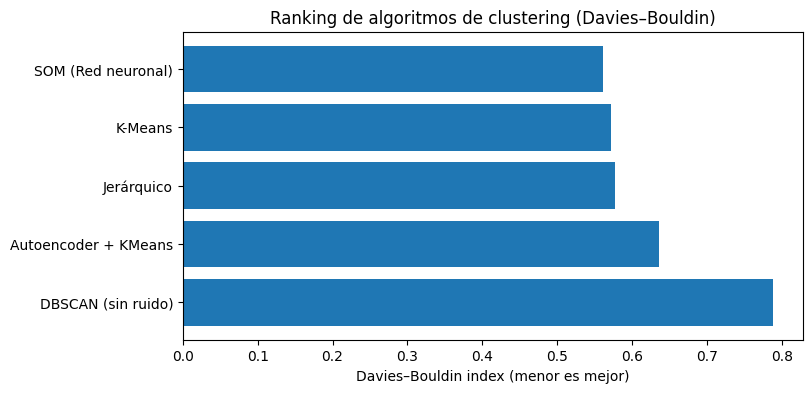

In [35]:
plt.figure(figsize=(8,4))
plt.barh(results_db["Algoritmo"], results_db["Davies-Bouldin"])
plt.gca().invert_yaxis()  # ranking 1 arriba
plt.title("Ranking de algoritmos de clustering (Davies–Bouldin)")
plt.xlabel("Davies–Bouldin index (menor es mejor)")
plt.show()

In [36]:
results_both = pd.DataFrame({
    "Algoritmo": [
        "K-Means",
        "Jerárquico",
        "Autoencoder + KMeans",
        "DBSCAN (sin ruido)",
        "SOM (Red neuronal)"
    ],
    "Silhouette": [
        sil_km,
        sil_agg,
        sil_nn,
        sil_db,
        sil_som
    ],
    "Davies-Bouldin": [
        db_km,
        db_agg,
        db_nn,
        db_db,
        db_som
    ]
})

results_both


,Algoritmo,Silhouette,Davies-Bouldin
0,K-Means,0.554657,0.572236
1,Jerárquico,0.553809,0.577862
2,Autoencoder + KMeans,0.561650,0.636286
3,DBSCAN (sin ruido),0.387558,0.788864
4,SOM (Red neuronal),0.358915,0.561207


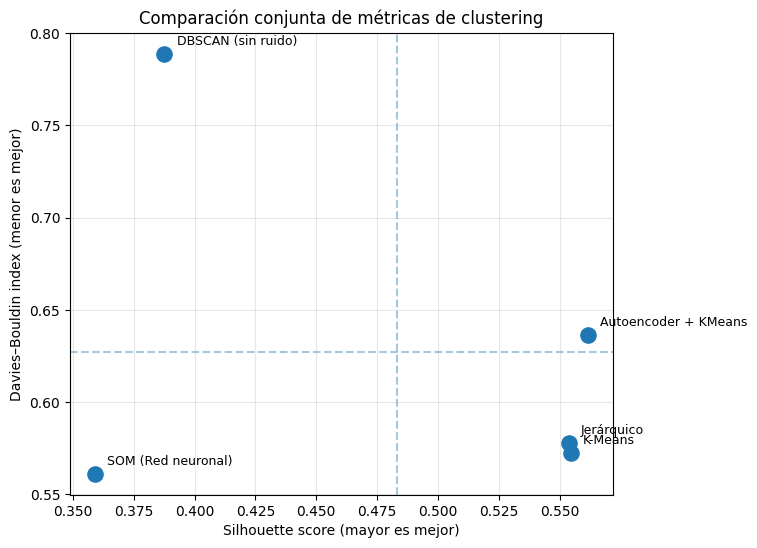

In [37]:
plt.figure(figsize=(7,6))

plt.scatter(
    results_both["Silhouette"],
    results_both["Davies-Bouldin"],
    s=120
)

# Etiquetas de cada punto
for i, row in results_both.iterrows():
    plt.text(
        row["Silhouette"] + 0.005,
        row["Davies-Bouldin"] + 0.005,
        row["Algoritmo"],
        fontsize=9
    )

plt.xlabel("Silhouette score (mayor es mejor)")
plt.ylabel("Davies–Bouldin index (menor es mejor)")
plt.title("Comparación conjunta de métricas de clustering")

# Líneas guía (opcional, muy didáctico)
plt.axvline(results_both["Silhouette"].mean(), linestyle="--", alpha=0.4)
plt.axhline(results_both["Davies-Bouldin"].mean(), linestyle="--", alpha=0.4)

plt.grid(True, alpha=0.3)
plt.show()